In [2]:
#Need to import different libraries that you will rely on heavily in python (these are usually sufficient)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sympy as sm

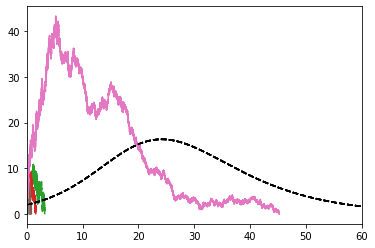

In [3]:
#Linda Allen Stochastic SIR Model in primer paper

#Parameters
N=100
gamma=0.15
beta=0.3
initI=2
initS=N-initI

#Time and timestep
dt=.00005
tmin=0
tmax = 60
t=np.arange(tmin,tmax,dt)

#How many simulations
m=8

#Deterministic Solution
def dXd_dt(x,t):
    return [-(beta*x[0]*x[1]/N), 
            (beta*x[0]*x[1]/N-gamma*x[1])]

X0d=[initS,initI]
Xs=odeint(dXd_dt,X0d,t)

sanswer=Xs[:,0]
ianswer=Xs[:,1]

#Euler Maruyama Stochastic Solution
S=np.zeros(len(t))
I=np.zeros(len(t))

for i in range(m):
    S[0]=initS
    I[0]=initI
    j=0

    #for j in range(len(t)-1): 
    while (I[j]>0 and j<=(len(t)-2)):
        
        r1=np.random.randn()
        r2=np.random.randn()
        
        S[j+1]=S[j]+(-(beta*S[j]*I[j]/N))*dt-(np.sqrt(beta*S[j]*I[j]/N))*r1*np.sqrt(dt)
        I[j+1]=I[j]+(beta*S[j]*I[j]/N-gamma*I[j])*dt+(np.sqrt(beta*S[j]*S[j]/N)*r1-np.sqrt(gamma*I[j])*r2)*np.sqrt(dt)
        j=j+1
 
    plt.plot(t[0:j],I[0:j],t,ianswer,'k--')
    plt.xlim(0,60)

/Users/kslyman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/Users/kslyman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars
/Users/kslyman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars
/Users/kslyman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in double_scalars


Case1=1000.0

Tend1=inf


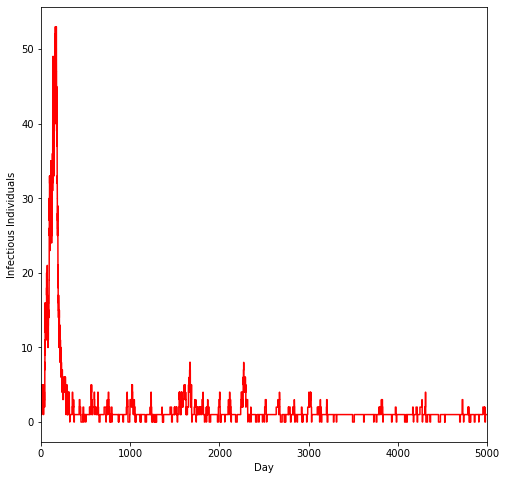

In [6]:
#Stochastic dynamics of an epidemic with recurrent spillovers from an endemic reservoir Model

init=1
#R0=.2 #pic1
R0=1.5 #pic2
#R0=2 #pic3
g=0.1 
beta=R0*g
#tau=0.000001 #pic1
tau=0.0001 #pic2
#tau=0.1 #pic3
c=5
N=1000
time=500
sim=1
ddt=0.01 #timestep
t=np.arange(0,time,ddt) #we do not actually use this t since CTMC! 
                        #Just getting a large initial size to use for vectors below
plt.rcParams["figure.figsize"] = (8,8)

Tend=np.zeros(len(t))
casetot=np.zeros(len(t))

for k in range(sim):
    
    i=np.zeros(len(t))
    r=np.zeros(len(t))
    s=np.zeros(len(t))
    tt=np.zeros(len(t))
    
    cas=init
    i[0]=init
    s[0]=N-init
    r[0]=0
    tt[0]=0
    j=0
    tot=N
    
    while (i[j]>=0 and j<=(len(t)-2)):
        omega=beta*s[j]*i[j]/tot+tau*s[j]+g*i[j]
        u1=np.random.rand() #For interevent time
        u2=np.random.rand() #For the event that occurs
        tt[j+1]=-np.log(u1)/omega+tt[j] #Interevent time
        event1=beta*i[j]*s[j]/tot/omega
        event2=event1+tau*s[j]/omega
        event3=event2+g*i[j]/omega
        
        if (u2<=event1): #Transmission
            i[j+1]=i[j]+1
            s[j+1]=s[j]-1
            r[j+1]=r[j]
            cas=cas+1 #count total number of cases
            
        elif (u2>event1 and u2<=event2): #spillover
            i[j+1]=i[j]+1
            s[j+1]=s[j]-1
            r[j+1]=r[j]
            cas=cas+1 #count total number of cases
        
        elif (u2>event2 and u2<=event3): #recovery
            i[j+1]=i[j]-1
            r[j+1]=r[j]+1
            s[j+1]=s[j]
            
        else:
            i[j+1]=i[j]
            r[j+1]=r[j]
            s[j+1]=s[j]
        
        j=j+1
        tot=s[j]+i[j]+r[j]
    
    casetot[k]=cas #total number of cases for each simulation
    Tend[k]=tt[j] #time epidemic ends for each simulation
    
    if k==0:
        plt.step(tt[0:j],i[0:j],'r-',label='k1')
        plt.xlabel('Day')
        plt.ylabel('Infectious Individuals')
        #plt.xlim(0,100000)
        #plt.ylim(0,10)
        plt.xlim(0,5000)      #pic2    
        #plt.xlim(0,100000)    #pic3
        #plt.ylim(0,200)       #pic3

        
print("Case1={}".format(casetot[0]))
print()
print("Tend1={}".format(Tend[0]))